## New York City Taxi & Limousine Commission

## Objective: Data cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
print(data.shape)
data.head()

(22699, 18)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
# Checking for null entries
data.isna().sum().sum()

0

In [6]:
# Checking for duplicate entries
data.duplicated().sum()

0

In [7]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Data Exploration

In [8]:
# Checking the extent of disparity for total amount
total_amt_sort = data['total_amount'].sort_values(ascending=False)
total_amt_sort.head(10)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
Name: total_amount, dtype: float64

In [9]:
# Investigating the total amount less than 1 dollar
total_amt_sort.tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [10]:
# Converting from object to datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object

### Data visualization and Exploratory data analysis (EDA)

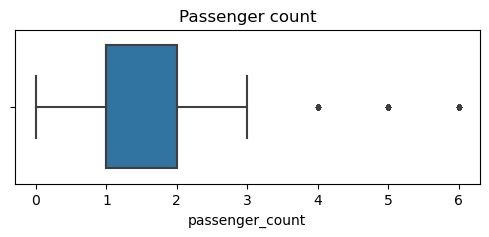

In [11]:
# Checking the distribution of passenger count
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='passenger_count', fliersize=3)
plt.title('Passenger count');

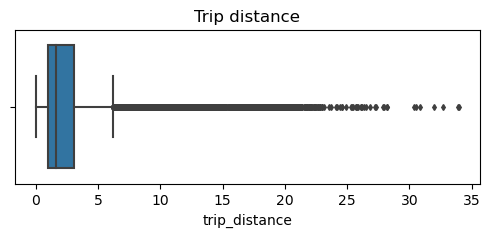

In [12]:
# Checking the distributon of trip distance
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='trip_distance', fliersize=3)
plt.title('Trip distance');

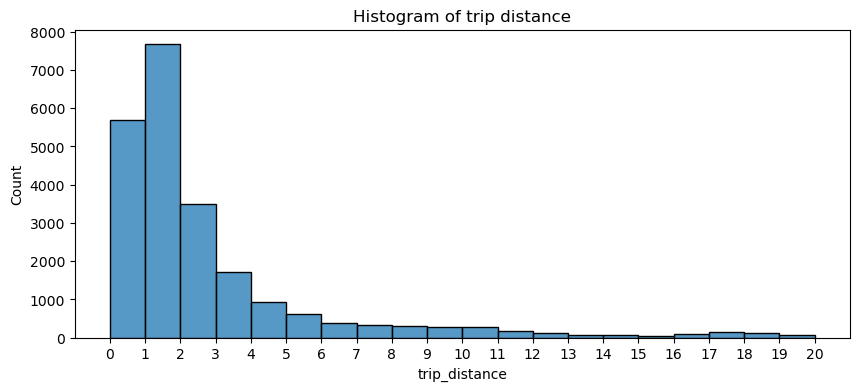

In [13]:
# Histogram of trip distance
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='trip_distance', bins=range(0, 21, 1))
plt.xticks(range(0,21,1))
plt.title('Histogram of trip distance');

In [14]:
data['extra'].unique()

array([ 0. ,  0.5,  1. , -0.5,  4.5, -1. ])

- The `extra` column allows for value of 0, 0.5, & 1 only. Therefore, the values of -0.5, 4.5, & -1 can be invested further to understand the data.

In [15]:
data['extra'].value_counts()

 0.0    11921
 0.5     7104
 1.0     3564
 4.5      101
-0.5        7
-1.0        2
Name: extra, dtype: int64

- The value of -0.5 & -1.0 could be a typo error, therefore can be corrected.
- The value of 4.5 could also be an error that should be corrected. Otherwise, it will be dropped pending an explanation.

- Data validation can be done to ensure the values inputted here are either 0, 0.5, or 1 only.

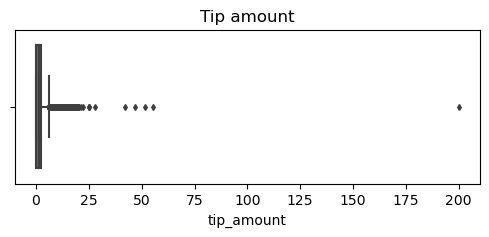

In [16]:
# Checking the distributon of tip amount
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='tip_amount', fliersize=3)
plt.title('Tip amount');

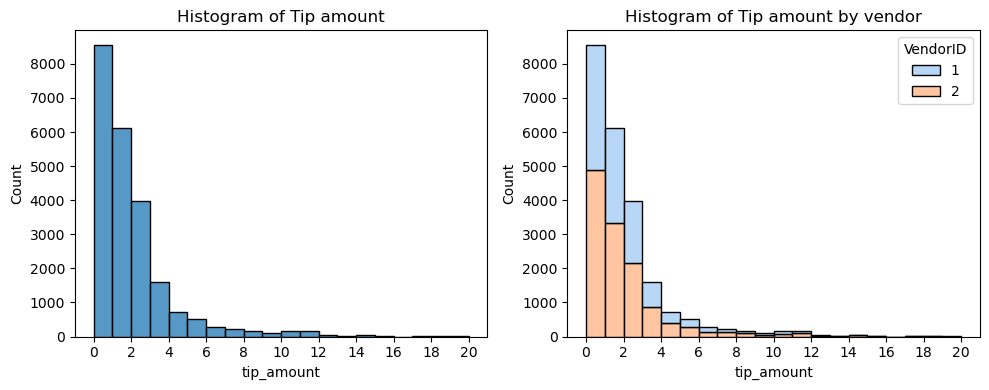

In [17]:
# Histogram of tip amount
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='tip_amount', bins=range(0, 21, 1), ax=ax[0])
ax[0].set_xticks(range(0, 21, 2))
ax[0].set_title('Histogram of Tip amount')

# histogram of tip amount by vendors
sns.histplot(data=data, x='tip_amount', bins=range(0, 21, 1),
            hue='VendorID', multiple='stack', palette='pastel', ax=ax[1])
ax[1].set_xticks(range(0, 21, 2))
ax[1].set_title('Histogram of Tip amount by vendor')
plt.tight_layout();

- The data is right skewed meaning more passengers tipped lower amount.
- Vendor 2 has a slightly higher proportion than vendor 1 and this proportion was maintained evenly.

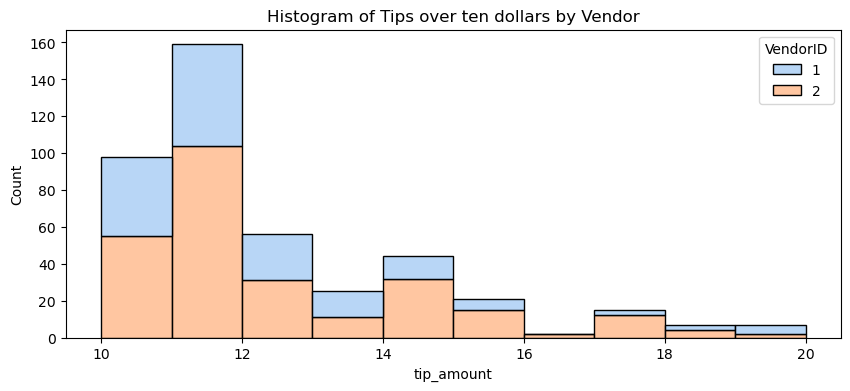

In [18]:
#Checking the proportion for higher tips over 10 dollars
tips_over_ten = data[data['tip_amount'] > 10]

plt.figure(figsize=(10,4))
sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10, 21, 1),
            hue='VendorID', multiple='stack', palette='pastel')
plt.xticks(range(10, 21, 2))
plt.title('Histogram of Tips over ten dollars by Vendor');

- With the exception of the extreme, the proportion of the vendors was maintained.

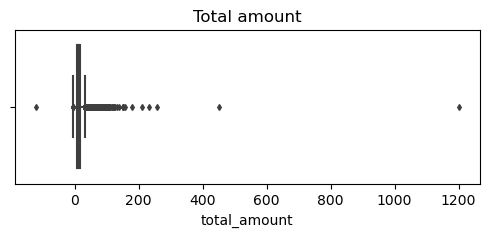

In [19]:
# Checking the distributon of total amount
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='total_amount', fliersize=3)
plt.title('Total amount');

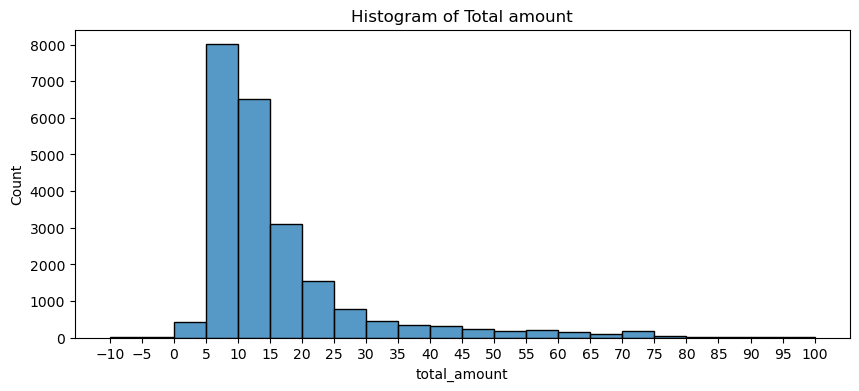

In [20]:
# Histogram of total amount
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='total_amount', bins=range(-10, 101, 5))
plt.xticks(range(-10,101,5))
plt.title('Histogram of Total amount');

In [21]:
# Checking the representation of VendorID in our data
print(data['VendorID'].value_counts())

# Calculating the average total amount of each vendor
data.groupby('VendorID').mean(numeric_only=True)[['total_amount']]

2    12626
1    10073
Name: VendorID, dtype: int64


,total_amount
VendorID,
1,16.298119
2,16.320382


In [22]:
# Checking the representation of payment type in our data
print(data['payment_type'].value_counts())

# Calculating the average total amount of each payment type
data.groupby('payment_type').mean(numeric_only=True)[['tip_amount']]

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64


,tip_amount
payment_type,
1,2.7298
2,0.0000
3,0.0000
4,0.0000


- Only credit card tip amount is represented in this data.

In [23]:
# Checking the representation of passenger count in our data
data['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

- Nearly two-third of the rides were single passengers
- Approximately 700 rides had 6 passengers
- 33 rides had zero passengers which doesn't make sense. This will be dropped unless a reasonable explanation can be found.

In [24]:
# Filtering credit card data
credit_card_data = data[data['payment_type'] == 1]

In [25]:
# Checking the representation of passenger count with credit card payment type in our data
credit_card_data['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

- Single passenger ride remains the highest representation in the data.

In [26]:
# Calculating the average credit card tip amount of each passenger count
avg_passenger_count_tip = credit_card_data.groupby('passenger_count').mean(numeric_only=True)[['tip_amount']]
avg_passenger_count_tip

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


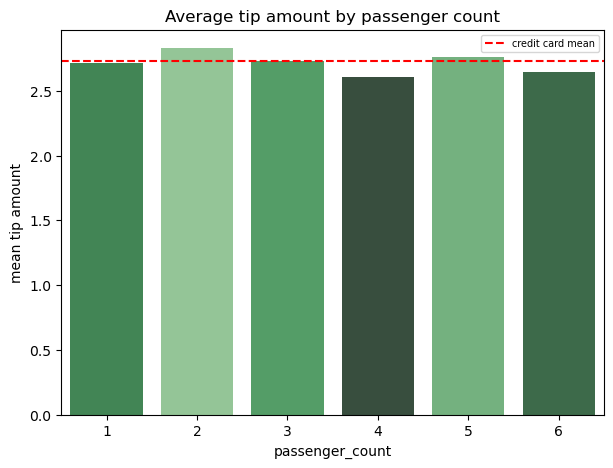

In [27]:
# Plotting average credit card tip amount by passenger count
plt.figure(figsize=(7,5))
plot_data = avg_passenger_count_tip.tail(-1)
pal = sns.color_palette("Greens_d", len(plot_data))
rank = plot_data['tip_amount'].argsort().argsort()

sns.barplot(data=plot_data, x=plot_data.index,
                 y='tip_amount', palette=np.array(pal[::-1])[rank])
plt.axhline(credit_card_data['tip_amount'].mean(), ls='--', color='r', label='credit card mean')
plt.legend(loc='upper right', fontsize=7)
plt.ylabel('mean tip amount')
plt.title('Average tip amount by passenger count');

No noticeabe change in mean tip amount across passenger count.

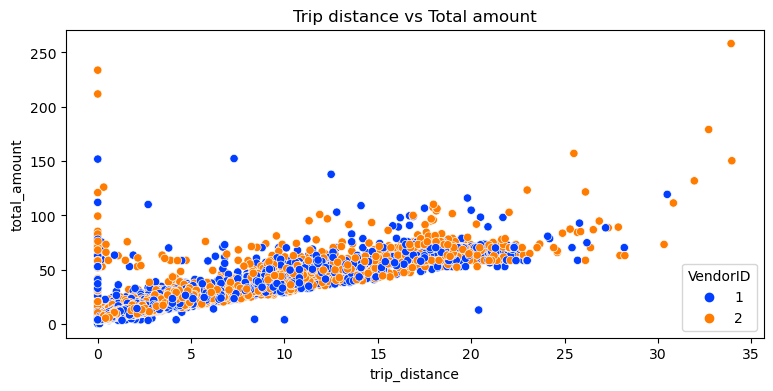

In [28]:
# Plotting trip distance vs total amount without outliers
plt.figure(figsize=(9,4))
plot_data=data[(data['total_amount']<400) & (data['total_amount']>0)]
sns.scatterplot(data=plot_data, x='trip_distance', y='total_amount',
               hue='VendorID', palette='bright')
plt.title('Trip distance vs Total amount');

- It is clear that as trip distance increases, total amount also increases.
- It is unusual that trip with 0 miles recorded increasing fare amount with vendor 2 having the highest amount.

In [29]:
zero_trip_distance = data[data['trip_distance']==0]
print('Count of zero trips:', len(zero_trip_distance))
zero_trip_distance['total_amount'].sort_values(ascending=False)

Count of zero trips: 148


20312    450.30
12511    233.74
15474    211.80
11269    151.82
7281     120.96
          ...  
14283      0.31
5722       0.00
10506      0.00
22566      0.00
10281     -4.30
Name: total_amount, Length: 148, dtype: float64

### Feature engineering and visualization

In [30]:
# Creating month and day columns
data['month'] = data['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
data['day'] = data['tpep_pickup_datetime'].dt.day_name().str.lower()

In [31]:
# Getting total number of rides per month
monthly_rides = data['month'].value_counts()
monthly_rides

mar    2049
oct    2027
apr    2019
may    2013
jan    1997
jun    1964
dec    1863
nov    1843
feb    1769
sep    1734
aug    1724
jul    1697
Name: month, dtype: int64

In [32]:
# Reordering the month to calender order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

jan    1997
feb    1769
mar    2049
apr    2019
may    2013
jun    1964
jul    1697
aug    1724
sep    1734
oct    2027
nov    1843
dec    1863
Name: month, dtype: int64

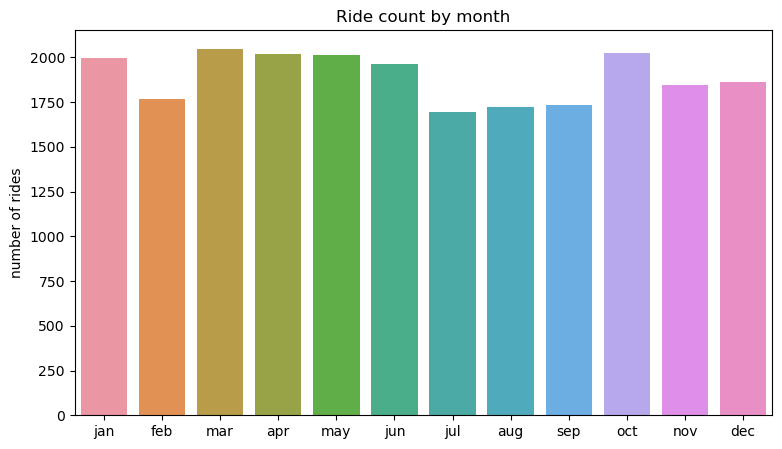

In [33]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_ylabel('number of rides')
ax.set_xticklabels(month_order, fontsize=10)
ax.set_title('Ride count by month');

- Rides are fairly consistent with noticeable drop during summer months of July, August, September, and also February.

In [34]:
# Getting total number of rides per day
daily_rides = data['day'].value_counts()
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

monday       2931
tuesday      3198
wednesday    3390
thursday     3402
friday       3413
saturday     3367
sunday       2998
Name: day, dtype: int64

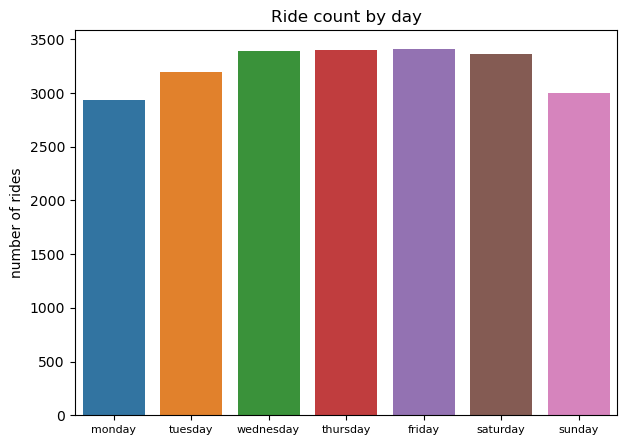

In [35]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_ylabel('number of rides')
ax.set_xticklabels(day_order, fontsize=8)
ax.set_title('Ride count by day');

- Surprisingly, Monday has a lower count as Sunday
- Wednesday through to saturday have higher ride count.
- Thursday has the highest ride count

In [36]:
# Calculating total revenue by day
total_amount_day = data.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
monday,49574.37
tuesday,52527.14
wednesday,55310.47
thursday,57181.91
friday,55818.74
saturday,51195.40
sunday,48624.06


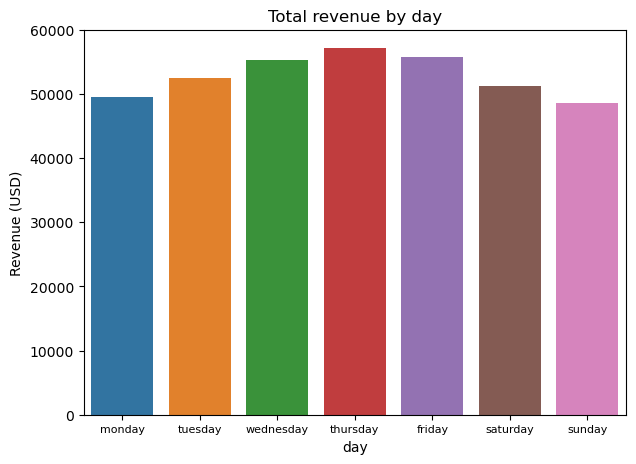

In [37]:
# Bar plot of total revenue by day
plt.figure(figsize=(7,5))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order, fontsize=8)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day');

- Thursday has the highest revenue
- Monday and Sunday have the lowest revenue
- Interesting to note that Saturday have 35 fewer rides than Thursday, however, the revenue difference is ~ $6,000 &mdash; more than a 10% drop


In [38]:
# Calculating total revenue by month
total_amount_month = data.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
jan,31735.25
feb,28937.89
mar,33085.89
apr,32012.54
may,33828.58
jun,32920.52
jul,26617.64
aug,27759.56
sep,28206.38


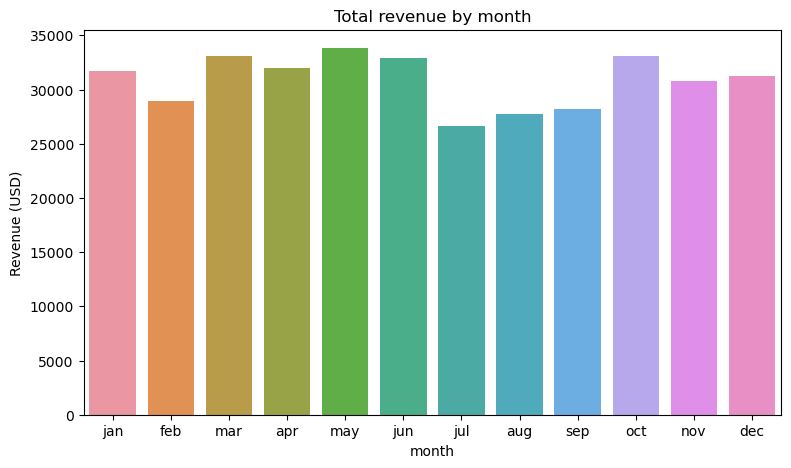

In [39]:
# Bar plot of total revenue by day
plt.figure(figsize=(9,5))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
ax.set_xticklabels(month_order, fontsize=10)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month');

- Similar to ride count by month, noticeable dip during summer months and February.

In [40]:
# Checking number of unique drop off locations
data['DOLocationID'].nunique()

216

In [41]:
# Getting mean trip distance to drop off locations
dropoff_distance = data.groupby(['DOLocationID']).mean(numeric_only=True)[['trip_distance']]
dropoff_distance = dropoff_distance.sort_values(by='trip_distance')
dropoff_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


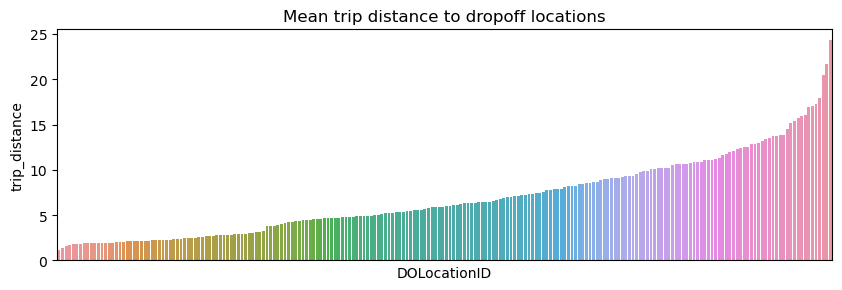

In [42]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=dropoff_distance.index, y=dropoff_distance['trip_distance'],
                order=dropoff_distance.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance to dropoff locations');

- This indicates the drop off point are relatively evenly distributed across the terrain.

In [43]:
# Checking to see if the drop off locations ID are consecutively numbered
data['DOLocationID'].max() - len(set(data['DOLocationID']))

49

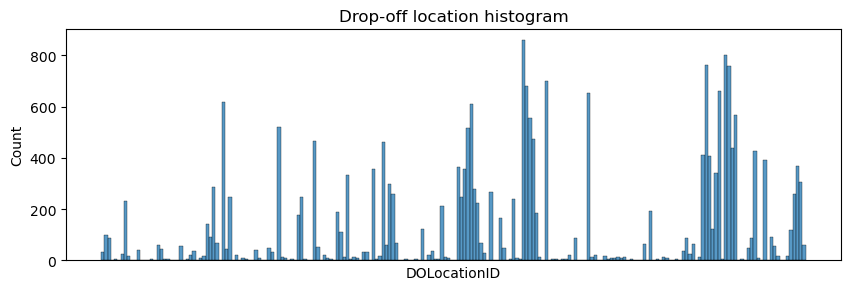

In [44]:
# Plotting histogram of dropoff locations
plt.figure(figsize=(10,3))

# transforming data to string so that there are no gaps in the histogram
plot_data = data['DOLocationID'].sort_values()

# converting from numeric to string data type
plot_data = plot_data.astype('str')

ax = sns.histplot(x=plot_data)
ax.set_xticks([])
plt.title('Drop-off location histogram');

- Only a few of the locations have majority of traffic out of the 200+ locations. With complete information (not in our dataset) like the name of the corresponding location ID, we can know for sure why these locations recieve majority of the traffic.

In [45]:
# Saving data as csv
data.to_csv('reg_data.csv', index=False)